In [19]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Paths to your Pistachio Image Dataset folders
kirmizi_folder = r'E:\Pista images\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio'
siirti_folder = r'E:\Pista images\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Siirt_Pistachio'

# Load images from both folders
kirmizi_images = load_images_from_folder(kirmizi_folder)
siirti_images = load_images_from_folder(siirti_folder)

# Combine images from both folders
all_images = kirmizi_images + siirti_images
print(f"Loaded {len(all_images)} images in total.")


Loaded 2148 images in total.


In [108]:
import pandas as pd 

In [21]:
def preprocess_images(images, size=(128, 128)):
    preprocessed_images = []
    for img in images:
        # Resize image
        img_resized = cv2.resize(img, size)
        # Normalize pixel values
        img_normalized = img_resized / 255.0
        preprocessed_images.append(img_normalized)
    return np.array(preprocessed_images)

# Preprocess the images
preprocessed_images = preprocess_images(all_images)
print(f"Preprocessed {len(preprocessed_images)} images.")


Preprocessed 2148 images.


In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.3/38.8 MB 5.0 MB/s eta 0:00:08
    --------------------------------------- 0.7/38.8 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.2/38.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.8 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/38.8 MB 8.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.5/38.8 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.7/38.8 MB 8.7 MB/s eta 0:00:05
   -- ------------------------------------- 2.7/38.8 MB 8.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.8/38.8 MB 7.2 MB/s eta 0:00:05
   ---- ----------------------------------- 4.3/38.8 MB 7.4 MB/s eta 0:00:05
   --

In [23]:
!pip install tensorflow

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/377.0 MB 12.9 MB/s eta 0:00:30
   ---------------------------------------- 0.8/377.0 MB 10.4 MB/s eta 0:00:37
   ---------------------------------------- 1.2/377.0 MB 9.8 MB/s eta 0:00:39
   ---------------------------------------- 1.5/377.0 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 2.0/377.0 MB 9.2 MB/s eta 0:00:41
   ---------------------------------------- 2.3/377.0 MB 9.1 MB/s eta 0:00:42
   ---------------------------------------- 2.7/377.0 MB 9.2 MB/s eta 0:00:41
   ---------------------------------------- 2.9/3

In [25]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [27]:
# Load the VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [29]:
def extract_features(images, model):
    features = []
    for img in images:
        # Prepare the image for the VGG model
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)
        # Extract features
        feature = model.predict(img)
        features.append(feature.flatten())
    return np.array(features)

# Extract features from the preprocessed images
features = extract_features(preprocessed_images, model)
print(f"Extracted features shape: {features.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [136]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Get the cluster labels
labels = kmeans.labels_
print(f"Cluster labels: {labels}")

Cluster labels: [1 2 1 ... 1 1 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


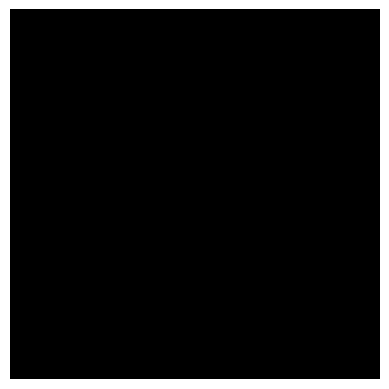

In [137]:
import matplotlib.pyplot as plt

# Example of displaying an image
plt.imshow(preprocessed_images[0])
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


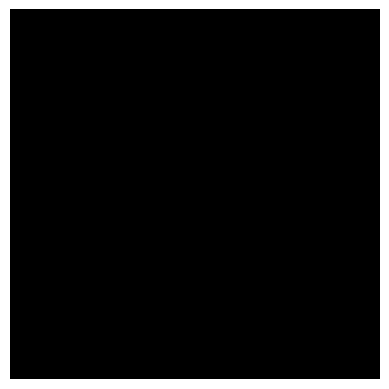

In [142]:
# Normalize pixel values to [0, 1]
normalized_img = preprocessed_images[5]
plt.imshow(normalized_img)
plt.axis('off')
plt.show()


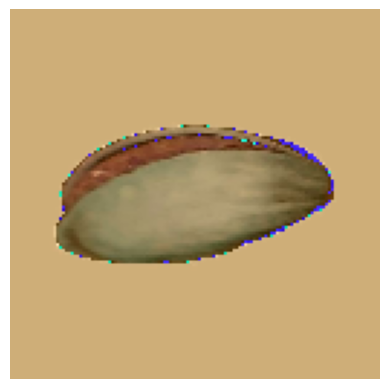

In [144]:
# Convert float image back to uint8 for imshow
img_uint8 = (normalized_img * 255).astype(np.uint8)
plt.imshow(img_uint8)
plt.axis('off')
plt.show()

In [146]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [148]:
# Create a DataFrame to store image paths, features, and cluster labels
df_images = pd.DataFrame({
    'image': all_images,
    'folder': ['Kirmizi_Pistachio'] * len(kirmizi_images) + ['Siirt_Pistachio'] * len(siirti_images),
    'features': features.tolist()  # Convert features to list for DataFrame compatibility
})

In [149]:
labels = kmeans.labels_
df_images['cluster_label'] = labels


In [152]:
import matplotlib.pyplot as plt

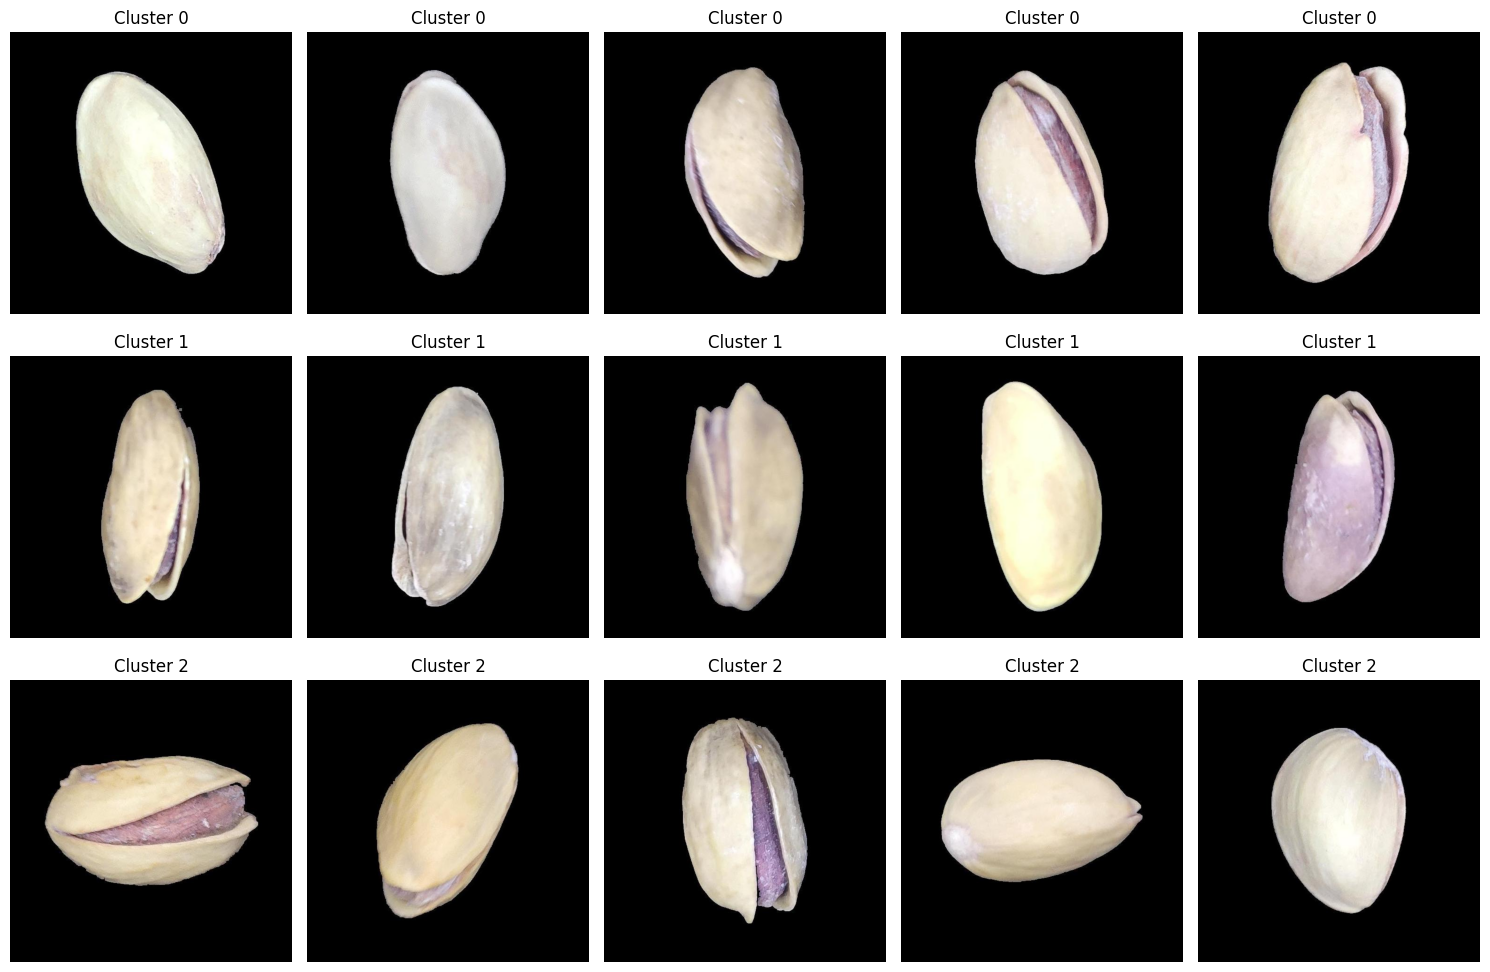

In [154]:
def visualize_clusters(df, num_clusters):
    plt.figure(figsize=(15, 10))
    for cluster in range(num_clusters):
        cluster_images = df[df['cluster_label'] == cluster].sample(min(5, len(df[df['cluster_label'] == cluster])), random_state=42)
        for i, (_, row) in enumerate(cluster_images.iterrows()):
            plt.subplot(num_clusters, 5, cluster * 5 + i + 1)
            plt.imshow(cv2.cvtColor(row['image'], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB if needed
            plt.axis('off')
            plt.title(f'Cluster {cluster}')
    plt.tight_layout()
    plt.show()

# Example usage: Visualize clusters
num_clusters = len(np.unique(labels))
visualize_clusters(df_images, num_clusters)

In [170]:
# Separate features for each cluster
features_cluster0 = df_images[df_images['cluster_label'] == 0]['features']
features_cluster1 = df_images[df_images['cluster_label'] == 1]['features']
features_cluster2 = df_images[df_images['cluster_label'] == 2]['features']

In [172]:
# Example assuming 'features' are stored as numpy arrays
features_cluster0 = np.array(df_images[df_images['cluster_label'] == 0]['features'].tolist())
features_cluster1 = np.array(df_images[df_images['cluster_label'] == 1]['features'].tolist())
features_cluster2 = np.array(df_images[df_images['cluster_label'] == 2]['features'].tolist())

In [174]:
mean_features_cluster0 = np.mean(features_cluster0, axis=0)
mean_features_cluster1 = np.mean(features_cluster1, axis=0)
mean_features_cluster2 = np.mean(features_cluster2, axis=0)

Mean Features - Cluster 0: [0. 0. 0. ... 0. 0. 0.]
Mean Features - Cluster 1: [0. 0. 0. ... 0. 0. 0.]
Mean Features - Cluster 2: [0. 0. 0. ... 0. 0. 0.]


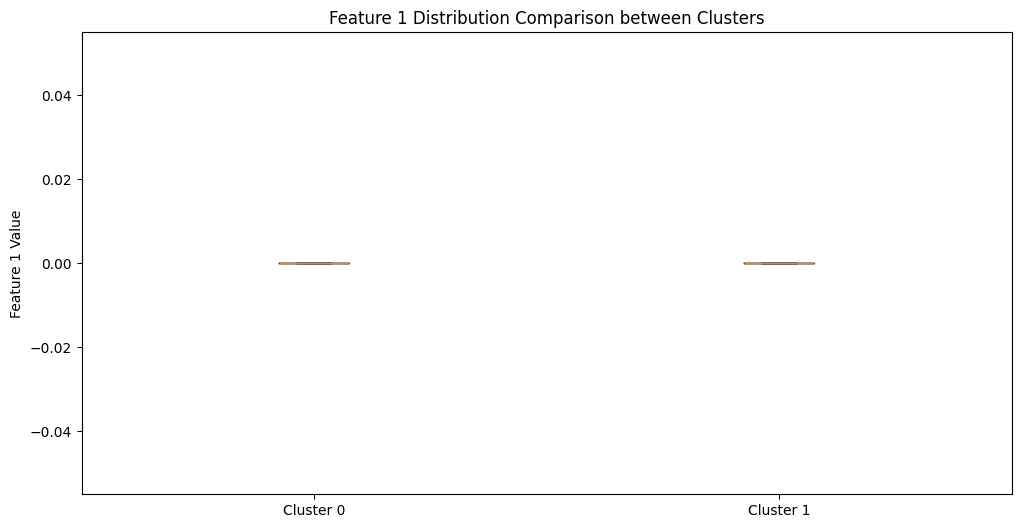

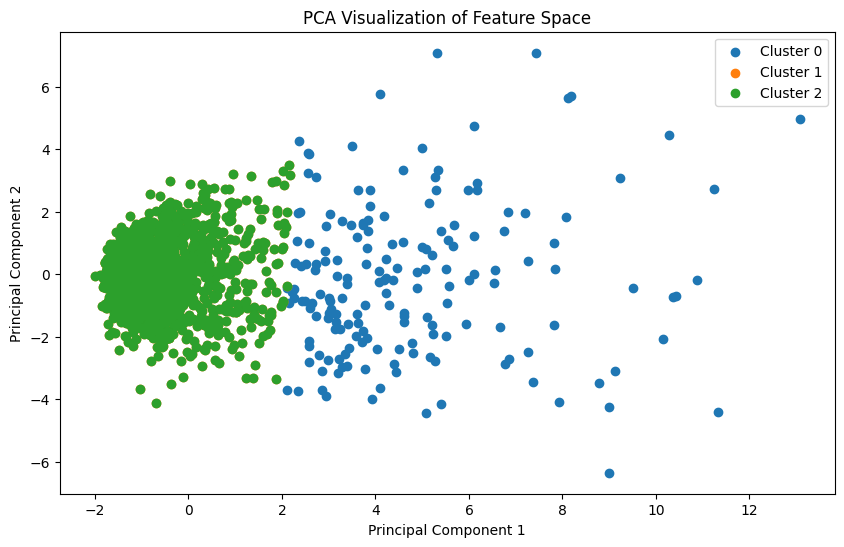

In [178]:
# Example: Assuming 'features' are already extracted and stored in your DataFrame 'df_images'
# Separate features for each cluster
features_cluster0 = np.array(df_images[df_images['cluster_label'] == 0]['features'].tolist())
features_cluster1 = np.array(df_images[df_images['cluster_label'] == 1]['features'].tolist())
features_cluster2 = np.array(df_images[df_images['cluster_label'] == 2]['features'].tolist())

# Compute mean features for each cluster
mean_features_cluster0 = np.mean(features_cluster0, axis=0)
mean_features_cluster1 = np.mean(features_cluster1, axis=0)
mean_features_cluster2 = np.mean(features_cluster2, axis=0)

# Print or visualize mean feature values
print("Mean Features - Cluster 0:", mean_features_cluster0)
print("Mean Features - Cluster 1:", mean_features_cluster1)
print("Mean Features - Cluster 2:", mean_features_cluster2)

# Example: Box plot comparison of feature distributions (if applicable)
plt.figure(figsize=(12, 6))
plt.boxplot([features_cluster0[:, 0], features_cluster1[:, 0]], labels=['Cluster 0', 'Cluster 1'])
plt.title('Feature 1 Distribution Comparison between Clusters')
plt.ylabel('Feature 1 Value')
plt.show()

# Example: PCA visualization of feature space (if applicable)
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
reduced_features = pca.fit_transform(np.vstack([features_cluster0, features_cluster1]))

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:len(features_cluster0), 0], reduced_features[:len(features_cluster0), 1], label='Cluster 0')
plt.scatter(reduced_features[len(features_cluster0):, 0], reduced_features[len(features_cluster0):, 1], label='Cluster 1')
plt.scatter(reduced_features[len(features_cluster0):, 0], reduced_features[len(features_cluster0):, 1], label='Cluster 2')
plt.title('PCA Visualization of Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Mean Features - Cluster 0: [0. 0. 0. ... 0. 0. 0.]
Mean Features - Cluster 1: [0. 0. 0. ... 0. 0. 0.]
Mean Features - Cluster 2: [0. 0. 0. ... 0. 0. 0.]


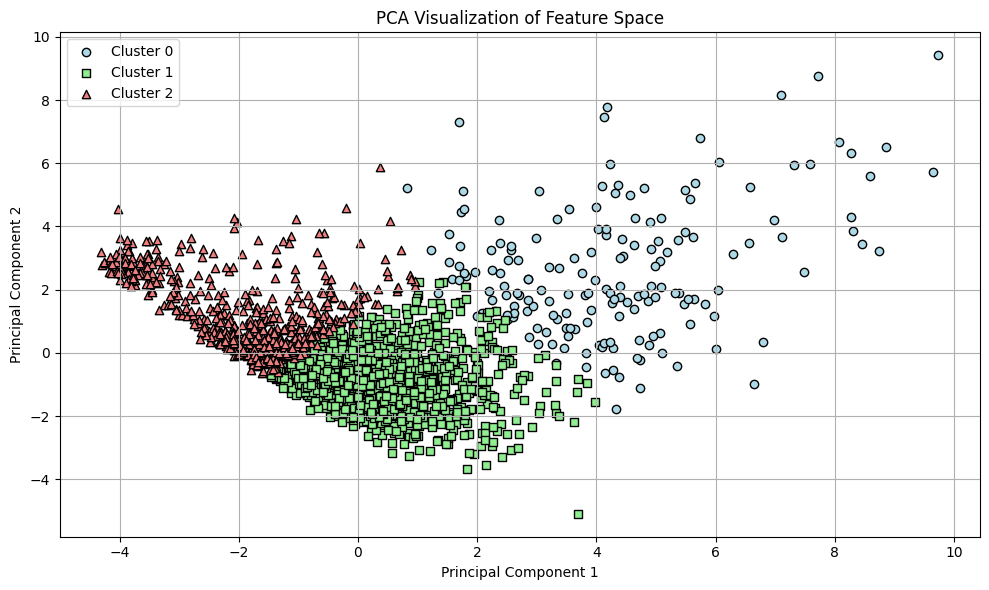

In [180]:
# Example: Assuming 'features' are already extracted and stored in your DataFrame 'df_images'
# Separate features for each cluster
features_cluster0 = np.array(df_images[df_images['cluster_label'] == 0]['features'].tolist())
features_cluster1 = np.array(df_images[df_images['cluster_label'] == 1]['features'].tolist())
features_cluster2 = np.array(df_images[df_images['cluster_label'] == 2]['features'].tolist())

# Compute mean features for each cluster
mean_features_cluster0 = np.mean(features_cluster0, axis=0)
mean_features_cluster1 = np.mean(features_cluster1, axis=0)
mean_features_cluster2 = np.mean(features_cluster2, axis=0)

# Print or visualize mean feature values
print("Mean Features - Cluster 0:", mean_features_cluster0)
print("Mean Features - Cluster 1:", mean_features_cluster1)
print("Mean Features - Cluster 2:", mean_features_cluster2)

# Example: PCA visualization of feature space with custom colors and markers
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(np.vstack([features_cluster0, features_cluster1, features_cluster2]))

# Plot PCA
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color and marker
plt.scatter(reduced_features[:len(features_cluster0), 0], reduced_features[:len(features_cluster0), 1], 
            label='Cluster 0', color='lightblue', marker='o', edgecolors='black')
plt.scatter(reduced_features[len(features_cluster0):len(features_cluster0)+len(features_cluster1), 0], 
            reduced_features[len(features_cluster0):len(features_cluster0)+len(features_cluster1), 1], 
            label='Cluster 1', color='lightgreen', marker='s', edgecolors='black')
plt.scatter(reduced_features[len(features_cluster0)+len(features_cluster1):, 0], 
            reduced_features[len(features_cluster0)+len(features_cluster1):, 1], 
            label='Cluster 2', color='lightcoral', marker='^', edgecolors='black')

plt.title('PCA Visualization of Feature Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()
plt.show()


In [166]:
from scipy.stats import ttest_ind

# Perform t-test for each feature dimension
t_stat, p_val = ttest_ind(features_cluster0, features_cluster1)

In [ ]:
#Principal Component Analysis (PCA) is a dimensionality reduction technique that identifies patterns 
#and reduces the number of variables while preserving the variance in the data, helping to uncover underlying 
#relationships and structure in high-dimensional datasets.

In [ ]:
1000000, 5